In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('pregnancy-risk-prediction-data-set.csv') 
df

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk
...,...,...,...,...,...,...,...,...,...,...,...
6098,2002617,Pragalya,24,96.0,101,142,97,20.3,39,6.7,mid risk
6099,2003332,Jyoshita,38,96.0,59,129,94,20.0,39,7.0,high risk
6100,2012649,Mrimnayi,40,103.3,145,123,95,24.6,36,5.0,high risk
6101,2010533,Vardhani,21,99.0,130,152,99,23.2,47,6.6,high risk


In [5]:
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [6]:
df.tail()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
6098,2002617,Pragalya,24,96.0,101,142,97,20.3,39,6.7,mid risk
6099,2003332,Jyoshita,38,96.0,59,129,94,20.0,39,7.0,high risk
6100,2012649,Mrimnayi,40,103.3,145,123,95,24.6,36,5.0,high risk
6101,2010533,Vardhani,21,99.0,130,152,99,23.2,47,6.6,high risk
6102,2002215,Nivashni,29,98.6,84,136,80,24.9,38,4.5,low risk


In [7]:
df.shape

(6103, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [9]:
df.isnull().sum()

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100

Patient ID                           0.0
Name                                 0.0
Age                                  0.0
Body Temperature(F)                  0.0
Heart rate(bpm)                      0.0
Systolic Blood Pressure(mm Hg)       0.0
Diastolic Blood Pressure(mm Hg)      0.0
BMI(kg/m 2)                          0.0
Blood Glucose(HbA1c)                 0.0
Blood Glucose(Fasting hour-mg/dl)    0.0
Outcome                              0.0
dtype: float64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().style.background_gradient()

,Patient ID,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,2003343.128461,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6604.395337,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,1993365.000000,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,1994890.500000,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,2003000.000000,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,2010128.000000,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,2013179.000000,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


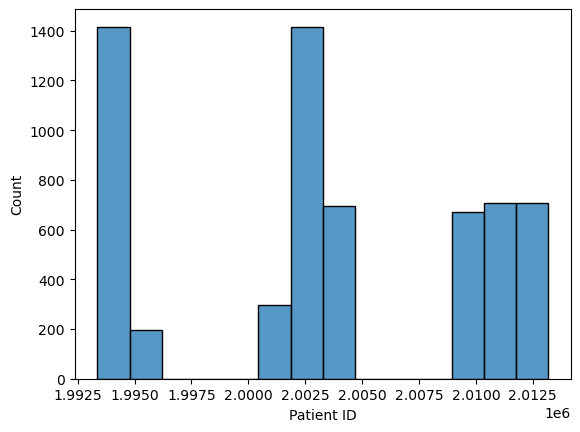

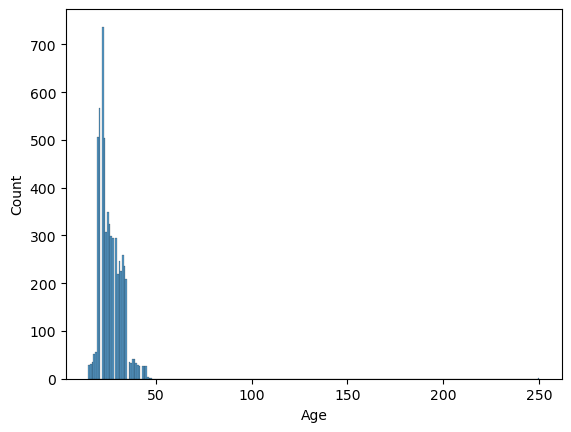

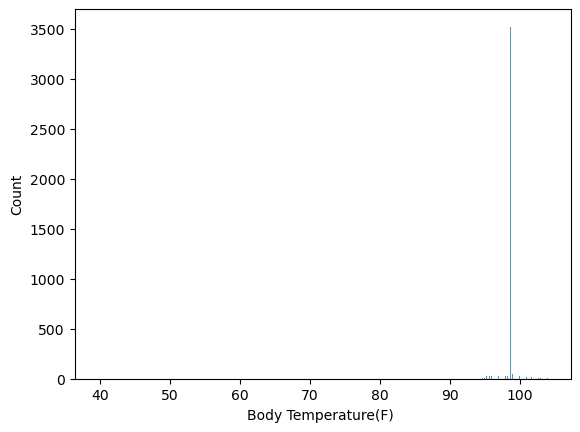

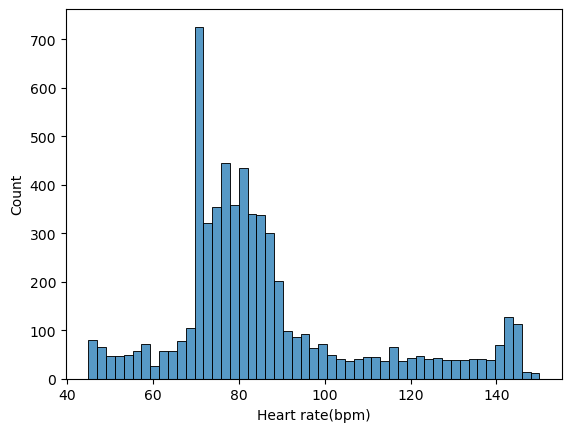

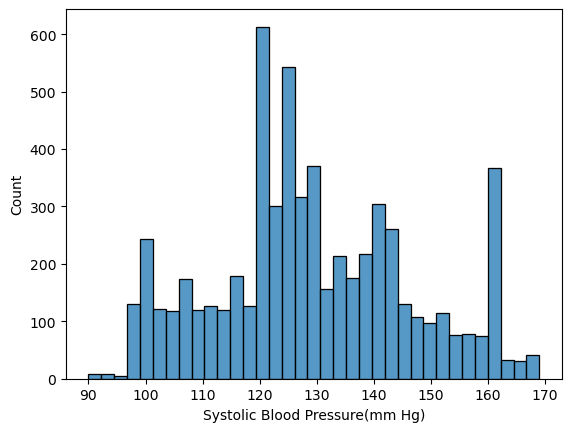

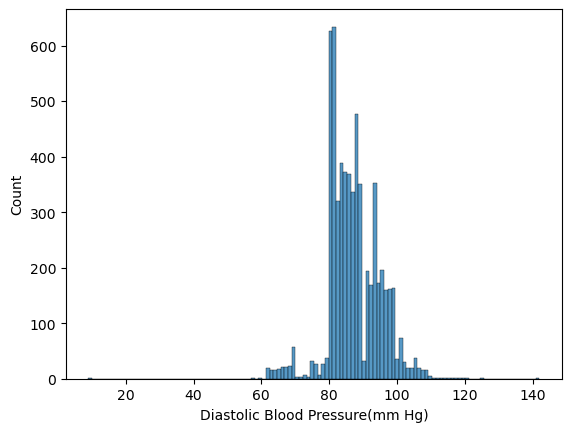

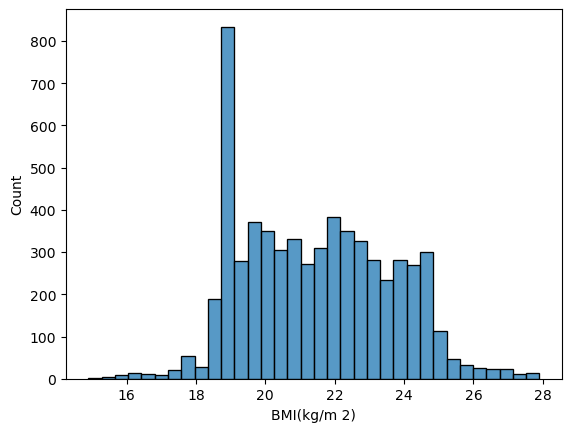

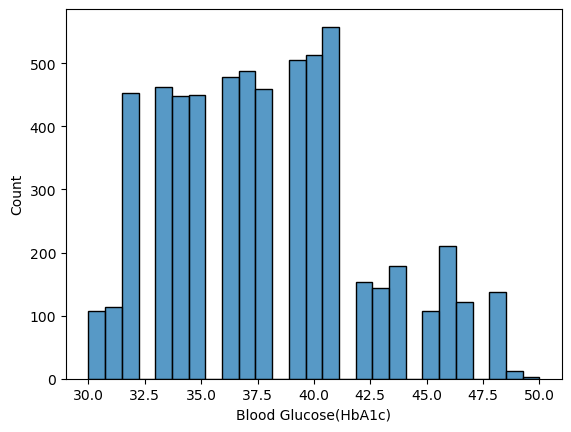

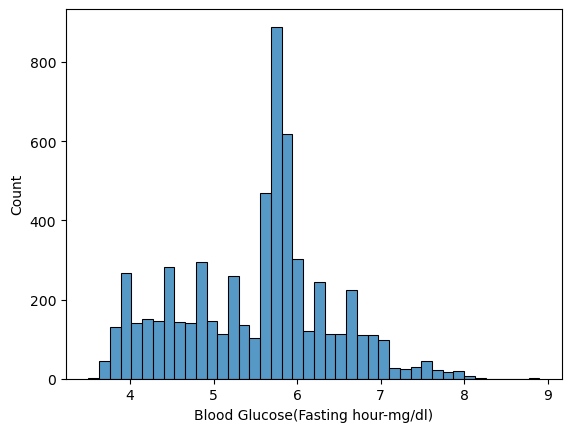

In [13]:
#histogram for distribution
for i in df.select_dtypes("number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

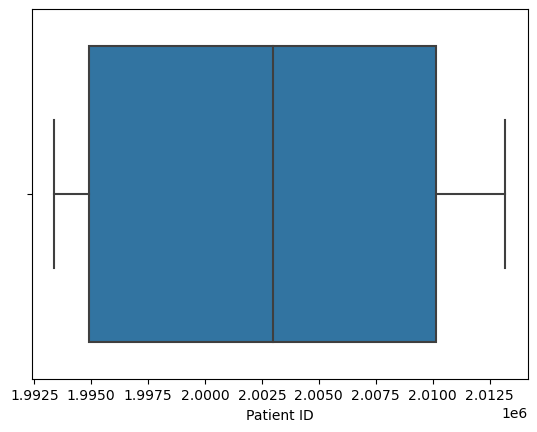

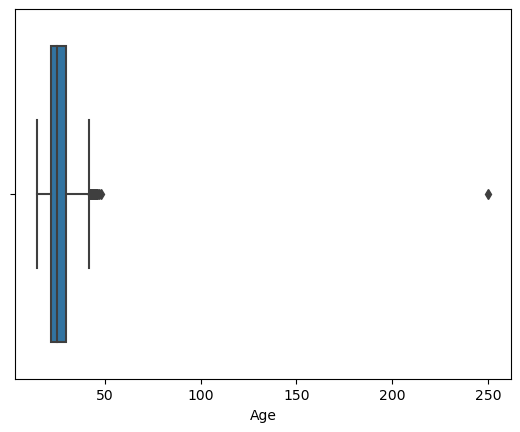

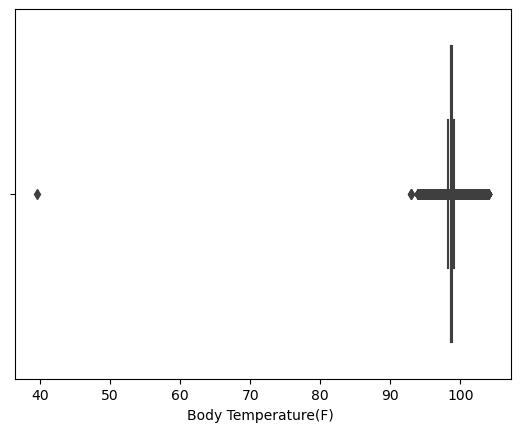

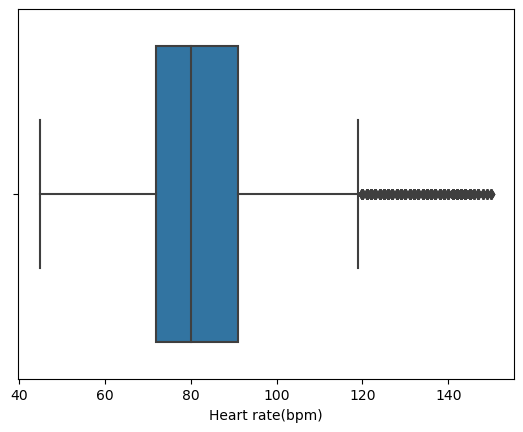

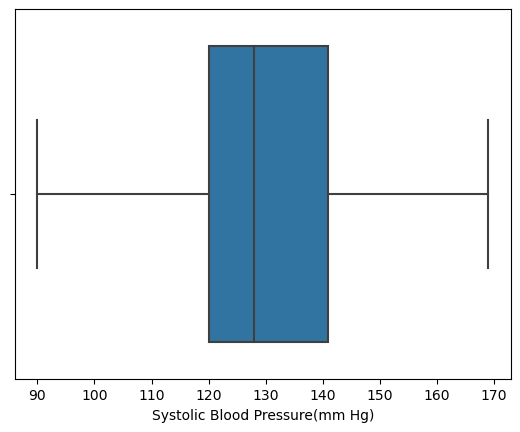

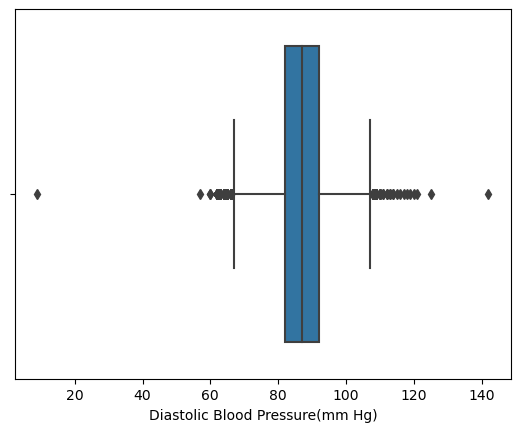

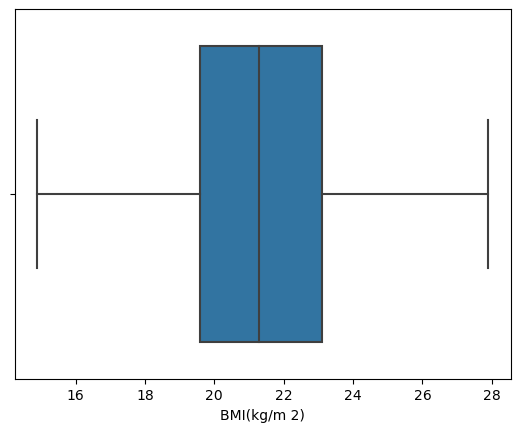

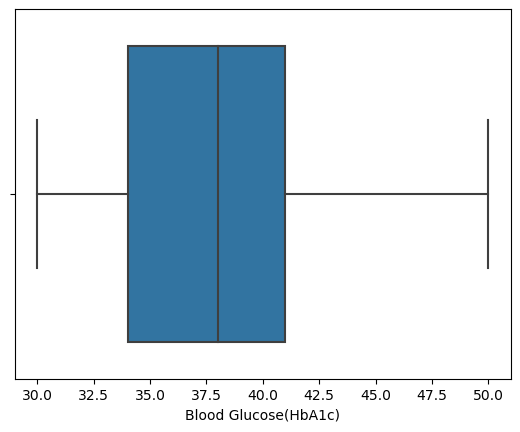

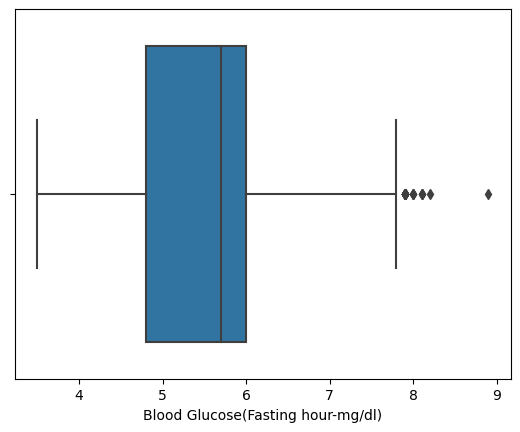

In [14]:
for i in df.select_dtypes("number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

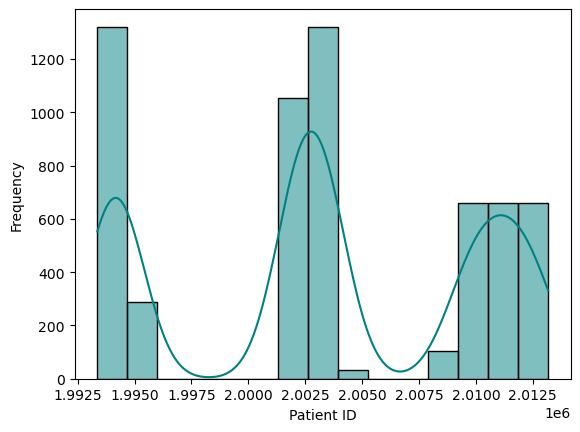

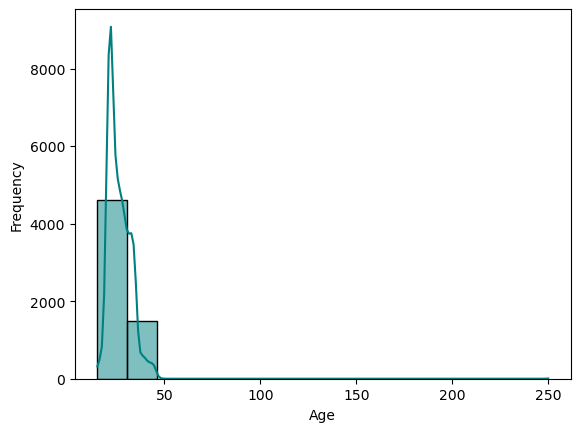

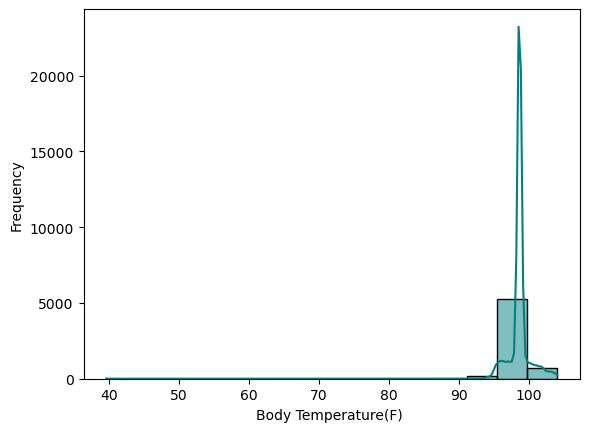

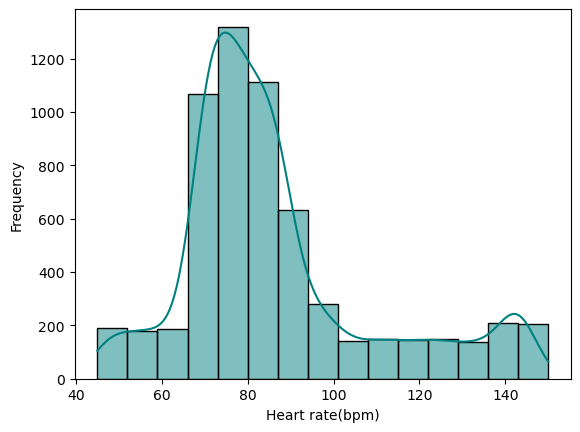

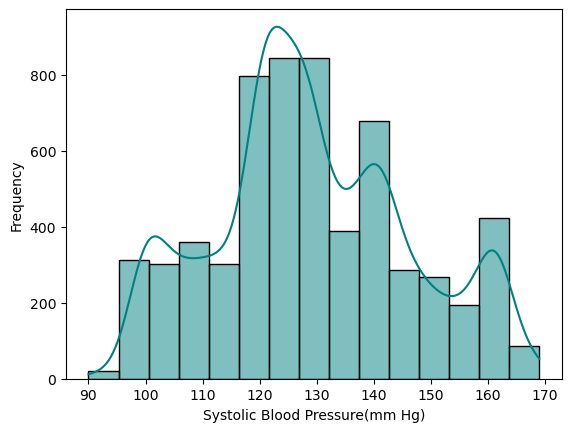

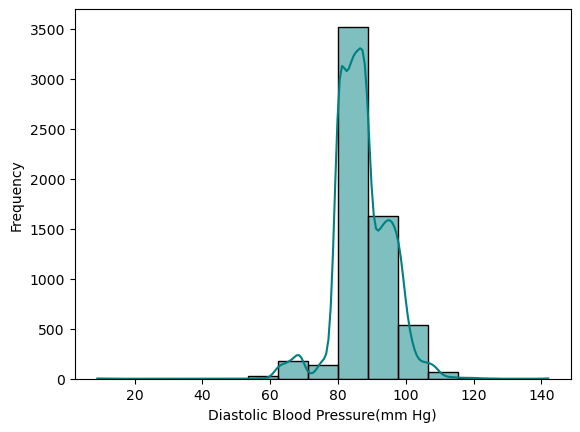

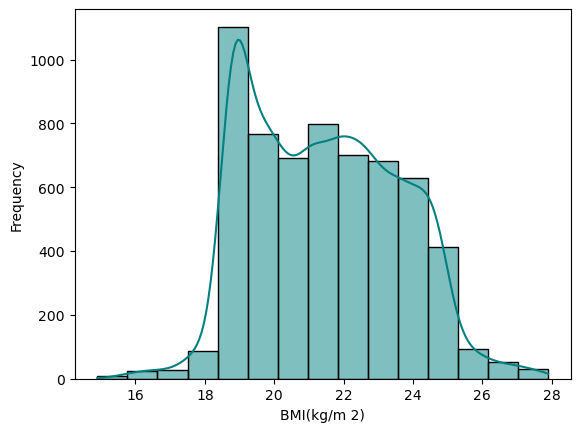

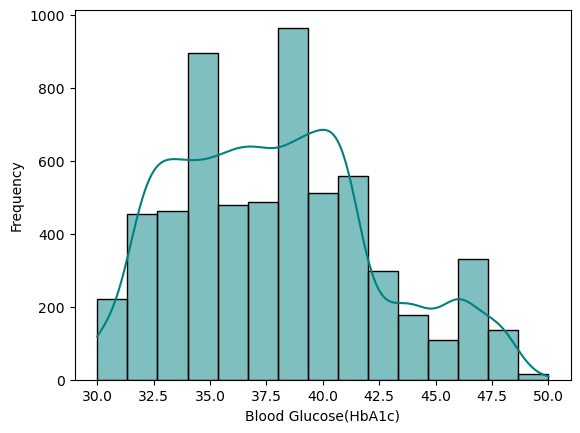

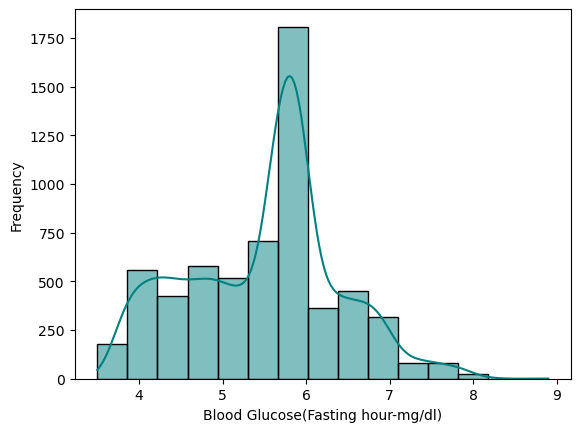

In [15]:
for i in df.select_dtypes(exclude = 'object'):
    ax = sns.histplot(x = df[i], color = 'teal', bins = 15, kde = True)
    ax.set(xlabel = i, ylabel = 'Frequency')
    plt.show()

In [16]:
df_clean = df.drop(columns=["Patient ID", "Name"])
df_clean

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,high risk
1,45,97.7,99,99,94,22.1,36,5.7,high risk
2,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,26,99.5,135,161,101,23.7,46,4.5,high risk
4,38,102.5,51,106,91,18.8,38,4.3,high risk
...,...,...,...,...,...,...,...,...,...
6098,24,96.0,101,142,97,20.3,39,6.7,mid risk
6099,38,96.0,59,129,94,20.0,39,7.0,high risk
6100,40,103.3,145,123,95,24.6,36,5.0,high risk
6101,21,99.0,130,152,99,23.2,47,6.6,high risk


In [17]:
label_encoder = LabelEncoder()
df_clean['Outcome'] = label_encoder.fit_transform(df_clean['Outcome'])


In [18]:
x= df_clean.drop(columns=['Outcome'])
print(x)

      Age  Body Temperature(F)   Heart rate(bpm)  \
0      20                  97.5               91   
1      45                  97.7               99   
2      29                  98.6               84   
3      26                  99.5              135   
4      38                 102.5               51   
...   ...                   ...              ...   
6098   24                  96.0              101   
6099   38                  96.0               59   
6100   40                 103.3              145   
6101   21                  99.0              130   
6102   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                              101   
4         

In [19]:
y = df_clean['Outcome']
print(y)


0       0
1       0
2       2
3       0
4       0
       ..
6098    2
6099    0
6100    0
6101    0
6102    1
Name: Outcome, Length: 6103, dtype: int32


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

In [25]:
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9918


In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       419
           1       1.00      1.00      1.00       397
           2       0.99      0.99      0.99       405

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



In [30]:
print("\n--- Predict Pregnancy Risk ---")
user_input = {}
for column in x.columns:
    user_value = input(f"Enter value for {column}: ")
    try:
        
        user_value = float(user_value)
    except ValueError:
       
        pass
    user_input[column] = user_value


--- Predict Pregnancy Risk ---
Enter value for Age: 57
Enter value for Body Temperature(F) : 200
Enter value for Heart rate(bpm): 145
Enter value for Systolic Blood Pressure(mm Hg): 124
Enter value for Diastolic Blood Pressure(mm Hg): 63
Enter value for BMI(kg/m 2): 45
Enter value for Blood Glucose(HbA1c): 77
Enter value for Blood Glucose(Fasting hour-mg/dl): 11


In [31]:

user_df = pd.DataFrame([user_input])


user_prediction = rf_model.predict(user_df)[0]

predicted_class = label_encoder.inverse_transform([user_prediction])[0]

print(f"\nPredicted Outcome: {predicted_class}")


Predicted Outcome: high risk
